# Lab | Data Aggregation and Filtering

In this challenge, we will continue to work with customer data from an insurance company. We will use the dataset called marketing_customer_analysis.csv, which can be found at the following link:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis.csv

This dataset contains information such as customer demographics, policy details, vehicle information, and the customer's response to the last marketing campaign. Our goal is to explore and analyze this data by first performing data cleaning, formatting, and structuring.

In [1]:
import pandas as pd
import numpy as np
url = "https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis.csv"
df = pd.read_csv(url)
df.head()

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [2]:
columns = df.columns.str.strip().str.replace(' ', '_').str.lower()
df.columns = columns
#df.rename(columns={df.columns[1]: "state"}, inplace=True)

In [3]:
df["month"] = df["effective_to_date"].str.split("/").str[0]
df

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN,2
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN,1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN,2
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


1. Create a new DataFrame that only includes customers who have a total_claim_amount greater than $1,000 and have a response of "Yes" to the last marketing campaign.

In [4]:
df_response_yes = df[(df['total_claim_amount'] > 1000) & (df['response'] == 'Yes')]
df_response_yes.head()

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
189,189,OK31456,California,11009.130490,Yes,Premium,Bachelor,1/24/11,Employed,F,...,1,Corporate Auto,Corporate L3,Offer2,Agent,1358.400000,Luxury Car,Medsize,NaN,1
236,236,YJ16163,Oregon,11009.130490,Yes,Premium,Bachelor,1/24/11,Employed,F,...,1,Special Auto,Special L3,Offer2,Agent,1358.400000,Luxury Car,Medsize,A,1
419,419,GW43195,Oregon,25807.063000,Yes,Extended,College,2/13/11,Employed,F,...,2,Personal Auto,Personal L2,Offer1,Branch,1027.200000,Luxury Car,Small,A,2
442,442,IP94270,Arizona,13736.132500,Yes,Premium,Master,2/13/11,Disabled,F,...,8,Personal Auto,Personal L2,Offer1,Web,1261.319869,SUV,Medsize,A,2
587,587,FJ28407,California,5619.689084,Yes,Premium,High School or Below,1/26/11,Unemployed,M,...,1,Personal Auto,Personal L1,Offer2,Web,1027.000029,SUV,Medsize,A,1


2. Using the original Dataframe, analyze the average total_claim_amount by each policy type and gender for customers who have responded "Yes" to the last marketing campaign. Write your conclusions.

In [5]:
df_response_yes.pivot_table(values='total_claim_amount', index='policy_type', columns='gender', aggfunc='mean').round(2)

gender,F,M
policy_type,,
Corporate Auto,1138.40,1171.15
Personal Auto,1214.85,1137.86
Special Auto,1358.40,1017.50


3. Analyze the total number of customers who have policies in each state, and then filter the results to only include states where there are more than 500 customers.

In [6]:
df["state"].value_counts()

state
California    3552
Oregon        2909
Arizona       1937
Nevada         993
Washington     888
Name: count, dtype: int64

4. Find the maximum, minimum, and median customer lifetime value by education level and gender. Write your conclusions.

In [7]:
df.groupby(['education', 'gender'])['customer_lifetime_value'].agg(['max', 'min', 'median']).round(2)

max      min   median
education            gender                            
Bachelor             F       73225.96  1904.00  5640.51
                     M       67907.27  1898.01  5548.03
College              F       61850.19  1898.68  5623.61
                     M       61134.68  1918.12  6005.85
Doctor               F       44856.11  2395.57  5332.46
                     M       32677.34  2267.60  5577.67
High School or Below F       55277.45  2144.92  6039.55
                     M       83325.38  1940.98  6286.73
Master               F       51016.07  2417.78  5729.86
                     M       50568.26  2272.31  5579.10

Men with "High School or Below" education have the highest median CLV (6,286.73), followed by women in the same category (6,039.55). This indicates that this demographic consistently generates significant value.

Women with "Doctor" education have the lowest median CLV (5,332.46), suggesting they bring lower value on average compared to other groups.

## Bonus

5. The marketing team wants to analyze the number of policies sold by state and month. Present the data in a table where the months are arranged as columns and the states are arranged as rows.

In [8]:
df.pivot_table(values='number_of_policies', index='state', columns='month', aggfunc='sum', fill_value=0)

month,1,2
state,,
Arizona,3052,2864
California,5673,4929
Nevada,1493,1278
Oregon,4697,3969
Washington,1358,1225


6.  Display a new DataFrame that contains the number of policies sold by month, by state, for the top 3 states with the highest number of policies sold.

*Hint:*
- *To accomplish this, you will first need to group the data by state and month, then count the number of policies sold for each group. Afterwards, you will need to sort the data by the count of policies sold in descending order.*
- *Next, you will select the top 3 states with the highest number of policies sold.*
- *Finally, you will create a new DataFrame that contains the number of policies sold by month for each of the top 3 states.*

In [9]:
total_policies_by_state = df.pivot_table(values='number_of_policies', index='state', aggfunc='sum').nlargest(3, 'number_of_policies').index
df.pivot_table(
    values='number_of_policies',
    index='state',
    columns='month',
    aggfunc='sum',
    fill_value=0).loc[total_policies_by_state]

month,1,2
state,,
California,5673,4929
Oregon,4697,3969
Arizona,3052,2864


7. The marketing team wants to analyze the effect of different marketing channels on the customer response rate.

Hint: You can use melt to unpivot the data and create a table that shows the customer response rate (those who responded "Yes") by marketing channel.

External Resources for Data Filtering: https://towardsdatascience.com/filtering-data-frames-in-pandas-b570b1f834b9

In [10]:
melted_data = df[['sales_channel', 'response']]


melted_data = melted_data.melt(id_vars=['sales_channel'], value_vars=['response'], var_name='metric', value_name='value')


response_rate = melted_data[melted_data['value'] == 'Yes'].groupby('sales_channel').size() / melted_data.groupby('sales_channel').size() * 100


response_rate_df = response_rate.reset_index()
response_rate_df.columns = ['sales_channel', 'response_rate']


print(response_rate_df)

  sales_channel  response_rate
0         Agent      18.005339
1        Branch      10.787558
2   Call Center      10.322279
3           Web      10.885609


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   unnamed:_0                     10910 non-null  int64  
 1   customer                       10910 non-null  object 
 2   state                          10279 non-null  object 
 3   customer_lifetime_value        10910 non-null  float64
 4   response                       10279 non-null  object 
 5   coverage                       10910 non-null  object 
 6   education                      10910 non-null  object 
 7   effective_to_date              10910 non-null  object 
 8   employmentstatus               10910 non-null  object 
 9   gender                         10910 non-null  object 
 10  income                         10910 non-null  int64  
 11  location_code                  10910 non-null  object 
 12  marital_status                 10910 non-null 

In [12]:
df.describe()

,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,10910.000000,10910.000000,10910.000000,10910.000000,10277.000000,10910.000000,10277.000000,10910.000000,10910.000000
mean,5454.500000,8018.241094,37536.284785,93.196059,15.149071,48.091934,0.384256,2.979193,434.888330
std,3149.590053,6885.081434,30359.195670,34.442532,10.080349,27.940675,0.912457,2.399359,292.180556
min,0.000000,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,2727.250000,4014.453113,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,271.082527
50%,5454.500000,5771.147235,33813.500000,83.000000,14.000000,48.000000,0.000000,2.000000,382.564630
75%,8181.750000,8992.779137,62250.750000,109.000000,23.000000,71.000000,0.000000,4.000000,547.200000
max,10909.000000,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


C:\Users\serge\AppData\Local\Temp\ipykernel_9620\2005955859.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=response_counts.index, y=response_counts.values, palette="pastel")


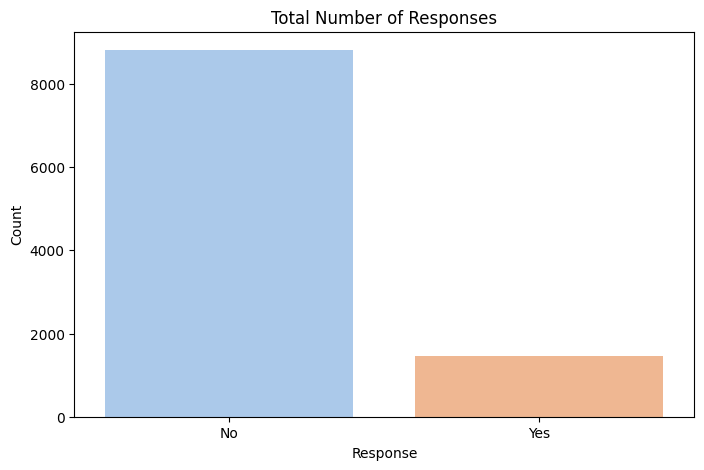

In [ ]:
#Show a plot of the total number of responses.

import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of responses
response_counts = df['response'].value_counts()

# Plot the response distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=response_counts.index, y=response_counts.values, palette="pastel")
plt.xlabel('Response')
plt.ylabel('Count')
plt.title('Total Number of Responses')
plt.show()

<Figure size 1000x600 with 0 Axes>

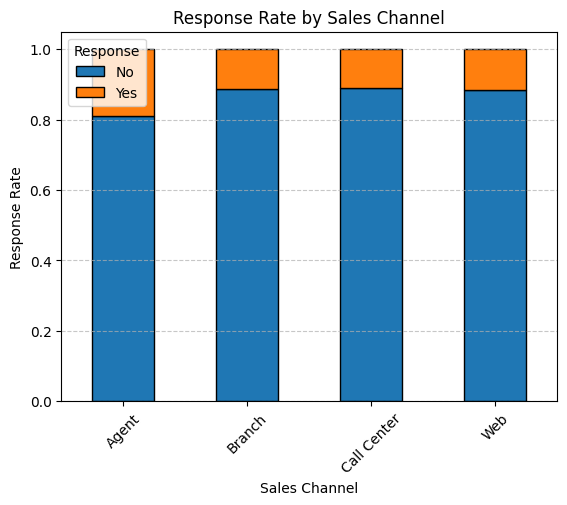

In [ ]:
# Show a plot of the response rate by the sales channel.
response_rate = df.groupby('sales_channel')['response'].value_counts(normalize=True).unstack()

# Plot response rate
plt.figure(figsize=(10, 6))
response_rate.plot(kind='bar', stacked=True, edgecolor='black')
plt.xlabel('Sales Channel')
plt.ylabel('Response Rate')
plt.title('Response Rate by Sales Channel')
plt.legend(title='Response')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\serge\AppData\Local\Temp\ipykernel_9620\501462055.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['response'], y=df['total_claim_amount'], palette='pastel')


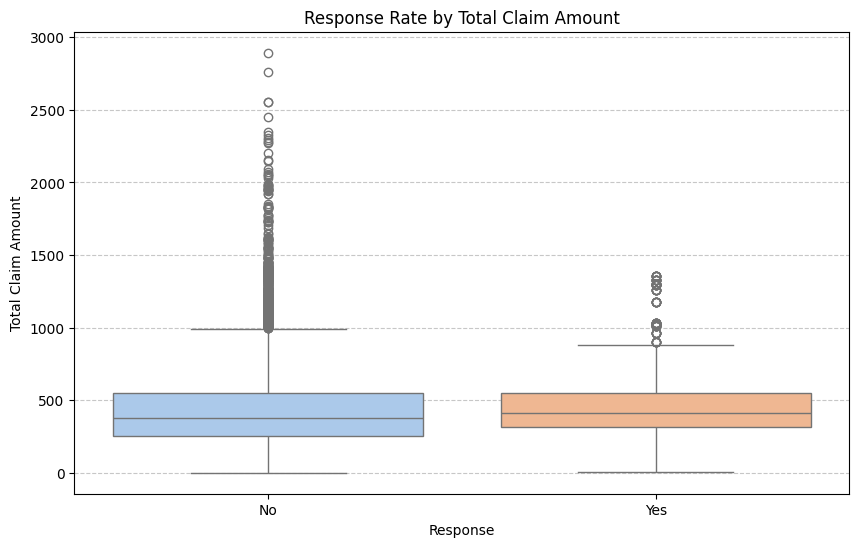

In [ ]:
#Show a plot of the response rate by the total claim amount.
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['response'], y=df['total_claim_amount'], palette='pastel')
plt.xlabel('Response')
plt.ylabel('Total Claim Amount')
plt.title('Response Rate by Total Claim Amount')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\serge\AppData\Local\Temp\ipykernel_9620\2745230741.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['response'], y=df['income'], palette='pastel')


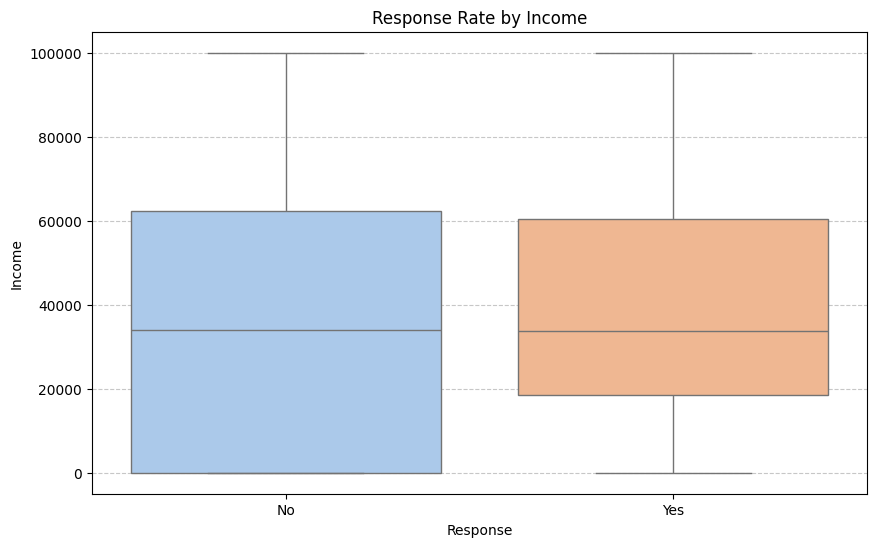

In [ ]:
#Show a plot of the response rate by income.
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['response'], y=df['income'], palette='pastel')
plt.xlabel('Response')
plt.ylabel('Income')
plt.title('Response Rate by Income')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()